In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sqlite3

In [24]:
import psycopg2

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "db_ds_students",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000231C4695B48>,
      dtype=object)

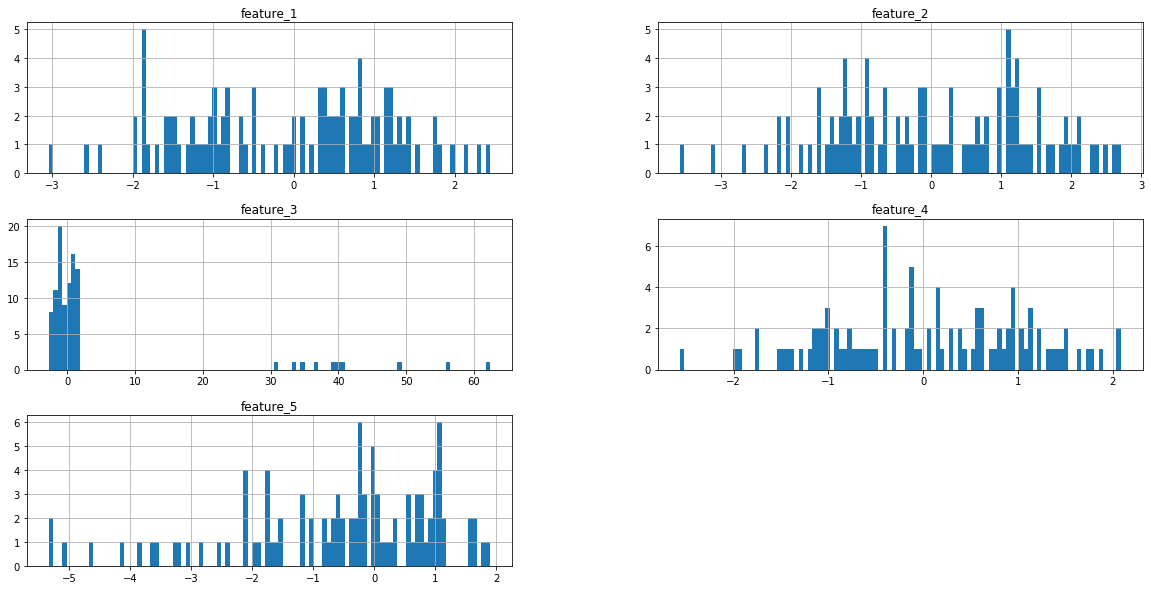

In [45]:
sql_str = "SELECT table_name FROM information_schema.tables WHERE table_schema='public';"
cursor.execute(sql_str)
conn.commit()

df = pd.read_sql_query("select * from public.exploratory;", conn)

df = df.astype('float')
df.hist(figsize =(20,10), bins = 100)

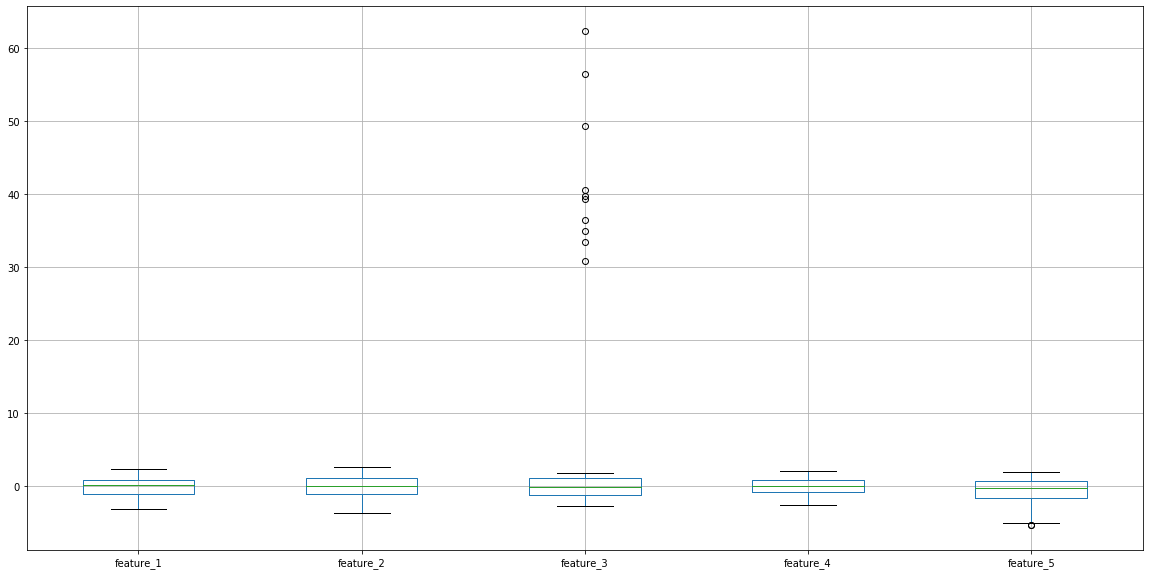

In [62]:
df.boxplot(figsize=(20,10)) # Наличие выбросов у feature_3 & feature_5

In [69]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5
0,2.439930,-2.180961,33.468496,-1.927388,-5.321392
1,1.770580,-1.174880,0.989593,-1.139681,-2.080220
2,0.742817,-0.263483,0.168149,-0.332438,-0.195720
3,-1.510892,2.712571,-2.685643,2.058495,-4.098402
4,-0.483511,0.096511,-0.028703,0.168763,-0.046664
...,...,...,...,...,...
95,0.107649,-3.101786,56.490912,-1.993768,-0.333903
96,1.759630,-1.428565,1.264442,-1.298354,-2.513746
97,0.843823,1.187656,-1.410026,0.566681,1.002171
98,0.867154,1.111556,-1.331718,0.513167,0.963890


(-7, 10)

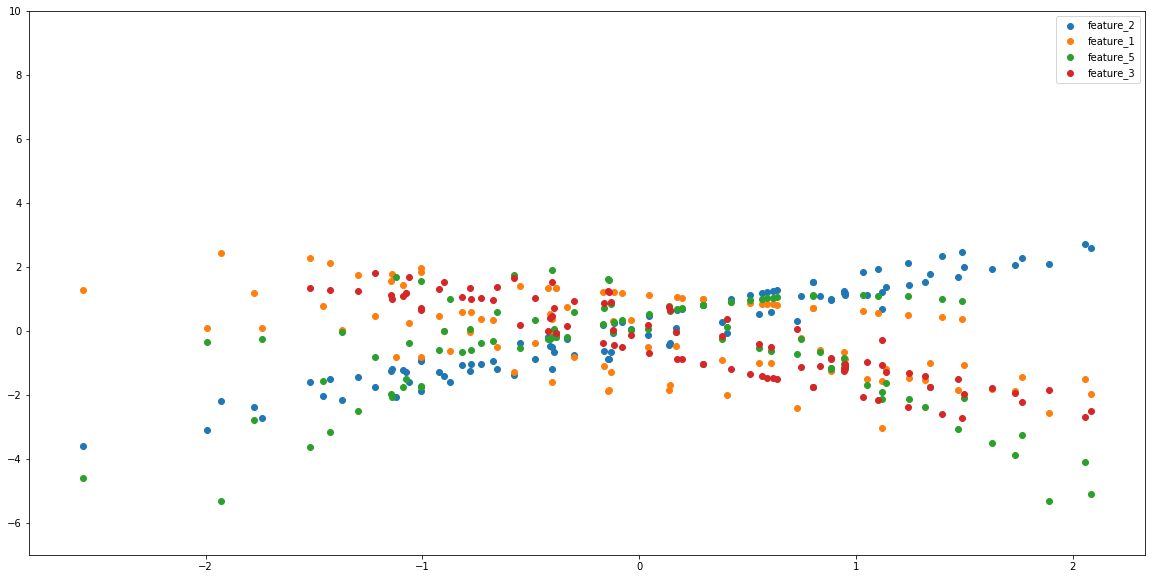

In [137]:
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(df['feature_4'], df['feature_2'])
ax.scatter(df['feature_4'], df['feature_1'])
ax.scatter(df['feature_4'], df['feature_5'])
ax.scatter(df['feature_4'], df['feature_3'])
ax.legend(['feature_2','feature_1','feature_5','feature_3'])
ax.set_ylim(-7,10)  #Лучше всего было бы включить в модель регрессии feature_1,2.